In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df1= pd.read_csv("CreditScore_train.csv")
df2= pd.read_csv("CreditScore_test.csv")

In [8]:
df1.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


In [9]:
df2.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1566464,21.0,21.0,21.0,44.0,1,0,0,4,0,...,0,NaN,0,0,1,1,5.0,0,NaN,406
1,925102,108.0,2.0,27.0,156.0,0,2,3,3,1,...,13090,0.593,1,1,1,0,1.0,0,NaN,679
2,1273974,218.0,64.0,107.0,218.0,0,0,0,0,0,...,13689,1.014,1,1,1,0,1.0,13689,1.014,750
3,1456723,NaN,NaN,NaN,146.0,1,0,0,1,1,...,0,NaN,1,1,1,0,NaN,0,NaN,515
4,798267,0.0,0.0,0.0,230.0,1,2,4,0,2,...,0,NaN,1,1,1,0,NaN,0,NaN,589


In [12]:
print("Train Data Shape b4 adding target col : ",df1.shape)
print("Test Data Shape b4 adding target col : ",df2.shape)

Train Data Shape b4 adding target col :  (80000, 306)
Test Data Shape b4 adding target col :  (20000, 306)


In [13]:
# innercity.csv has 21613 rows in reality, but we are only loading/previewing the first 1000 rows
df1.dataframeName = 'CreditScore_train.csv'
nRow, nCol = df1.shape
print(f'TRAIN DATA : There are {nRow} rows and {nCol} columns')

df2.dataframeName = 'CreditScore_test.csv'
nRow, nCol = df2.shape
print(f'TEST DATA : There are {nRow} rows and {nCol} columns')

df1["source"] = "train"
df2["source"] = "test"

merged_df = pd.concat([df1,df2])
merged_df.dataframeName = 'Merged_DF'

nRow, nCol = merged_df.shape
print(f'MERGED DATA : There are {nRow} rows and {nCol} columns')

TRAIN DATA : There are 80000 rows and 306 columns
TEST DATA : There are 20000 rows and 306 columns
MERGED DATA : There are 100000 rows and 306 columns


In [14]:
merged_df.head(5)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x297,x298,x299,x300,x301,x302,x303,x304,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,NaN,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0.8417,1,1,1,0,NaN,0,NaN,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,NaN,0,0,0,0,NaN,0,NaN,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,NaN,1,1,1,0,NaN,0,NaN,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,1.0180,1,1,1,0,NaN,0,NaN,485,train


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 19999
Columns: 306 entries, x001 to source
dtypes: float64(41), int64(264), object(1)
memory usage: 234.2+ MB


In [15]:
merged_df.columns

Index(['x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009',
       'x010',
       ...
       'x297', 'x298', 'x299', 'x300', 'x301', 'x302', 'x303', 'x304', 'y',
       'source'],
      dtype='object', length=306)

In [16]:
merged_df.dtypes

x001        int64
x002      float64
x003      float64
x004      float64
x005      float64
           ...   
x302      float64
x303        int64
x304      float64
y           int64
source     object
Length: 306, dtype: object

In [17]:
merged_df.isnull().any()

x001      False
x002       True
x003       True
x004       True
x005       True
          ...  
x302       True
x303      False
x304       True
y         False
source    False
Length: 306, dtype: bool

In [18]:
merged_df.isna().sum()

x001          0
x002      21432
x003      21432
x004      21424
x005       6110
          ...  
x302      73069
x303          0
x304      81875
y             0
source        0
Length: 306, dtype: int64

In [19]:
merged_df.duplicated().sum()

0

In [20]:
merged_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
x001,100000.0,NaN,NaN,NaN,1218243.8211,272897.724977,517.0,974363.5,1235926.0,1445326.25,1677197.0
x002,78568.0,NaN,NaN,NaN,125.711727,115.785117,0.0,32.0,100.0,180.0,718.0
x003,78568.0,NaN,NaN,NaN,25.541238,49.028751,0.0,3.0,8.0,24.0,704.0
x004,78576.0,NaN,NaN,NaN,65.393212,63.592317,0.0,19.0,48.0,92.0,704.0
x005,93890.0,NaN,NaN,NaN,178.238545,124.520628,0.0,87.0,150.0,246.0,827.0
...,...,...,...,...,...,...,...,...,...,...,...
x302,26931.0,NaN,NaN,NaN,2.948758,2.12943,1.0,1.0,1.0,5.0,9.0
x303,100000.0,NaN,NaN,NaN,6410.88291,24190.243313,0.0,0.0,0.0,0.0,785537.0
x304,18125.0,NaN,NaN,NaN,1.037957,0.33058,0.0,0.9758,1.0486,1.1862,5.1569
y,100000.0,NaN,NaN,NaN,619.19823,118.461932,300.0,524.0,599.0,720.0,839.0


#Replace the missing value with a large negative number (e.g. -999).#Replace the missing value with mean of the column.
#
Replace the missing value with median of the column.

In [21]:
##missing data
total = merged_df.count()
sumcol=merged_df.isnull().sum()
countcol=merged_df.isnull().count()

percent = (merged_df.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])
missing_data.sort_values(['Percent'], axis=0, ascending=False)
#missing_data.head(20)

miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
miss_perc

,Total,Percent,Sumcol,countcol
x242,6661,93.339,93339,100000
x295,13467,86.533,86533,100000
x304,18125,81.875,81875,100000
x098,19319,80.681,80681,100000
x155,20949,79.051,79051,100000
...,...,...,...,...
x107,100000,0.000,0,100000
x106,100000,0.000,0,100000
x105,100000,0.000,0,100000
x104,100000,0.000,0,100000


In [22]:
#missing data
total = merged_df.count()
sumcol=merged_df.isnull().sum()
countcol=merged_df.isnull().count()

percent = (merged_df.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])
#missing_data.head(20)
miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
m_per = miss_perc[miss_perc.Percent > 60]
print(m_per)

      Total  Percent  Sumcol  countcol
x242   6661   93.339   93339    100000
x295  13467   86.533   86533    100000
x304  18125   81.875   81875    100000
x098  19319   80.681   80681    100000
x155  20949   79.051   79051    100000
x259  22568   77.432   77432    100000
x257  23087   76.913   76913    100000
x256  23087   76.913   76913    100000
x255  23087   76.913   76913    100000
x302  26931   73.069   73069    100000
x268  32747   67.253   67253    100000
x162  33519   66.481   66481    100000
x267  33539   66.461   66461    100000
x265  33539   66.461   66461    100000
x266  33539   66.461   66461    100000
x253  33667   66.333   66333    100000


In [23]:
drop_cols=m_per.index
print(drop_cols)
#[cols.append(i) for i in drop_cols if df[i].isnull().sum()/row*100 > 60 ]
#count=0
filtered_df=merged_df.drop(columns=drop_cols,axis=1)

#for i in drop_cols:
 #   print(i)
#    count=count+1
#filt_concat_df=df_concat.drop(columns=[i],axis=1)
print(filtered_df.shape)

Index(['x242', 'x295', 'x304', 'x098', 'x155', 'x259', 'x257', 'x256', 'x255',
       'x302', 'x268', 'x162', 'x267', 'x265', 'x266', 'x253'],
      dtype='object')
(100000, 290)


In [24]:
filtered_df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x294,x296,x297,x298,x299,x300,x301,x303,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0,17318,0.8417,1,1,1,0,0,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,0,NaN,0,0,0,0,0,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,0,NaN,1,1,1,0,0,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,0,17413,1.0180,1,1,1,0,0,485,train


In [25]:
filtered_df['y']

0        807
1        819
2        803
3        530
4        485
        ... 
19995    541
19996    831
19997    543
19998    488
19999    491
Name: y, Length: 100000, dtype: int64

In [26]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

#Correlation#

1 - Positively correlat#ed
-1 - Negatively correlat#ed.
0 - Not correlated.

In [27]:
print(filtered_df.dtypes)

x001        int64
x002      float64
x003      float64
x004      float64
x005      float64
           ...   
x300        int64
x301        int64
x303        int64
y           int64
source     object
Length: 290, dtype: object


In [28]:
for column in filtered_df.columns:
    unique_values = filtered_df[column].unique()
    print(f"Column '{column}' unique values: {unique_values}")

Column 'x001' unique values: [1084094 1287777 1483016 ...  795243 1323781 1341326]
Column 'x002' unique values: [426. 160. 163.  nan   3. 112. 343. 175.  53.  10. 152. 146.  12. 330.
 357. 203. 353. 360. 159. 245.  40.  24.   8. 180. 293.  22.  75.  27.
 205.  26.  62. 128.  16. 254. 125. 188.  60.   0.  42.  14. 186.   4.
  37.   9. 168.  15. 248.  21.  86.  94. 281.   6. 144.  32. 356.  50.
 149. 236. 126. 364. 170. 139. 169. 136. 204. 174. 109.   2.  88.  11.
 240.  82. 158. 201.  20. 187. 626.  49.  41.  61.  77.   7.  96. 208.
 235. 222.  39.  19. 166.  48.   5. 111.  97. 388.  74. 227.  30. 362.
  92.  98.  64. 577.  29. 305. 130. 233. 107. 274.  66. 289.  59.  18.
 142.  47. 304. 196. 247. 108. 212. 172. 239. 114.  78. 255.  84.  79.
  63.  91.  36.  38. 104.  17. 154.  31. 493.  25. 327.  43.  55.  46.
 191. 478.  28. 347. 238. 634. 427. 256. 182. 277. 161. 217. 133. 119.
 284. 213. 135. 262.  99. 298. 268.  51.  85. 218.  54. 123. 122. 153.
 276. 207. 117. 110. 100. 253. 320. 

In [29]:
filtered_df = filtered_df.dropna()  # Drop rows with NaN values

In [30]:
numeric_columns = filtered_df.select_dtypes(include=['float64', 'int64']).columns
filtered_numeric_df = filtered_df[numeric_columns]
correlations = filtered_numeric_df.corr()

In [31]:
#correlations
correlations = filtered_numeric_df.corr()

In [32]:
filtered_df.drop(columns=['source'], inplace=True)

In [33]:
filtered_df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x293,x294,x296,x297,x298,x299,x300,x301,x303,y
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,1.0180,0,17413,1.0180,1,1,1,0,0,485
11,1163403,152.0,3.0,59.0,152.0,0,2,2,2,0,...,0.9784,0,26278,0.9784,1,1,1,0,0,655
20,1061526,159.0,3.0,91.0,159.0,0,3,3,0,1,...,0.6191,34224,6390,0.5164,1,1,1,1,29893,547
41,1611235,188.0,14.0,107.0,188.0,0,0,0,2,1,...,0.6271,0,6742,0.6271,1,1,1,0,0,679
43,1608716,60.0,2.0,22.0,119.0,0,3,5,4,1,...,0.6559,0,14602,0.6559,1,1,1,0,0,506


In [34]:
filtered_df.corr()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x293,x294,x296,x297,x298,x299,x300,x301,x303,y
x001,1.000000,0.043031,0.017882,0.057862,0.042167,-0.028241,-0.005878,-0.086189,-0.057962,-0.021485,...,-0.025090,-0.002879,0.015077,-0.029591,-0.000329,0.002259,0.004792,0.000632,0.008067,0.097999
x002,0.043031,1.000000,0.185740,0.844425,0.689610,0.150445,-0.126478,-0.152813,-0.056391,0.010580,...,-0.096549,0.050915,0.097600,-0.106819,0.008304,-0.011949,-0.017230,0.011248,0.077834,0.304658
x003,0.017882,0.185740,1.000000,0.420926,0.151626,0.247096,-0.350475,-0.343142,-0.127107,-0.054313,...,-0.179345,0.014640,-0.046912,-0.183643,-0.050781,-0.076052,-0.108946,-0.003571,0.002734,0.133687
x004,0.057862,0.844425,0.420926,1.000000,0.583375,0.233454,-0.295383,-0.345085,-0.181224,-0.070584,...,-0.101082,0.068068,0.076429,-0.120242,-0.012398,-0.038558,-0.045447,0.051645,0.112763,0.320834
x005,0.042167,0.689610,0.151626,0.583375,1.000000,0.112923,-0.105310,-0.133265,-0.056482,0.010565,...,-0.155429,0.010890,0.055969,-0.154223,-0.003969,-0.020688,-0.017268,-0.031016,-0.008568,0.371602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x299,0.002259,-0.011949,-0.076052,-0.038558,-0.020688,0.010108,0.017570,0.015856,0.028111,0.023272,...,0.020164,0.008637,0.019395,0.014701,0.601664,1.000000,0.706653,-0.004112,0.011581,-0.001059
x300,0.004792,-0.017230,-0.108946,-0.045447,-0.017268,0.003843,0.016785,0.012733,0.017674,0.018094,...,0.015725,0.006104,0.012672,0.008675,0.425167,0.706653,1.000000,-0.012227,0.001944,-0.005257
x301,0.000632,0.011248,-0.003571,0.051645,-0.031016,-0.057362,0.017235,-0.003801,-0.024730,-0.039350,...,0.243988,0.104823,0.190209,0.191959,0.012433,-0.004112,-0.012227,1.000000,0.356264,-0.094014
x303,0.008067,0.077834,0.002734,0.112763,-0.008568,-0.022475,0.030525,0.018793,0.041270,0.077683,...,0.381109,0.308000,0.753571,0.323848,0.030549,0.011581,0.001944,0.356264,1.000000,-0.080123


Text(0.5, 1.0, 'PEARSON CORRELATION')

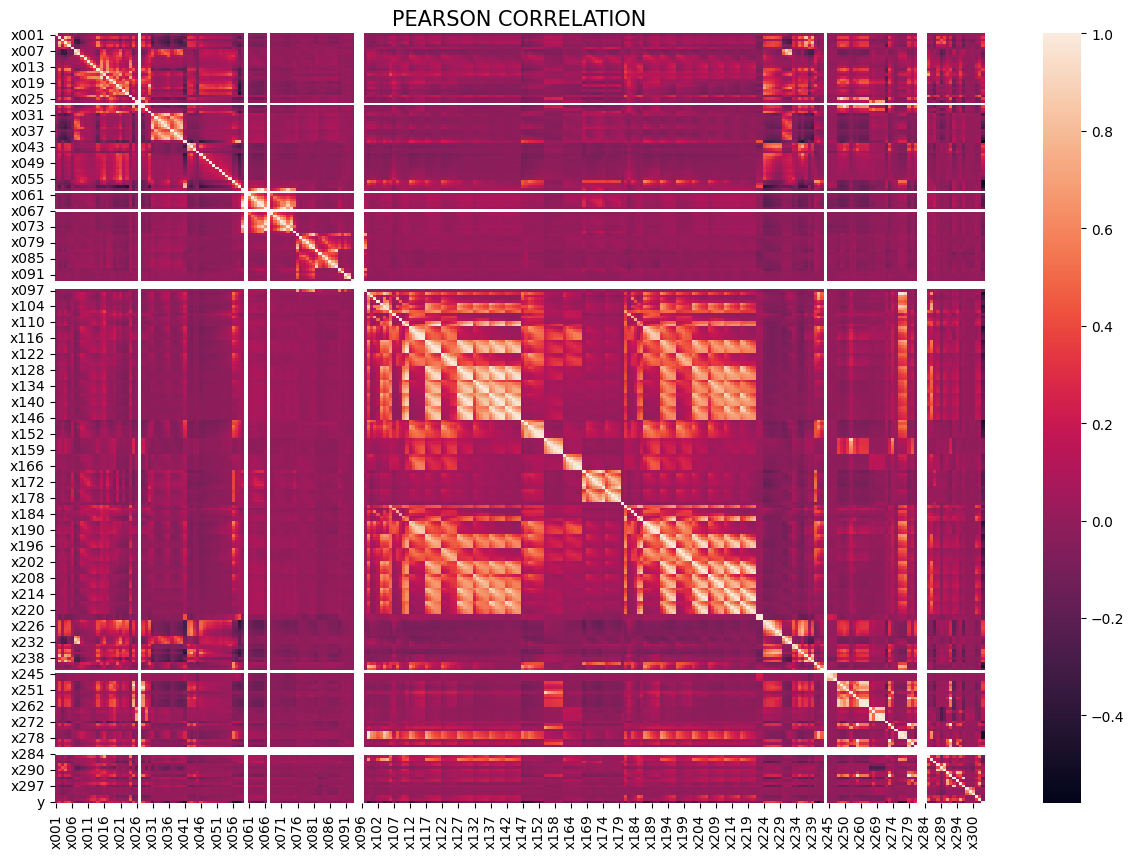

In [35]:
#PEARSON CORRELATION

plt.figure(figsize = (15,10))
sns.heatmap(filtered_df.corr(method="pearson"))
plt.title('PEARSON CORRELATION', fontsize=15)

In [36]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [37]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<Axes: >

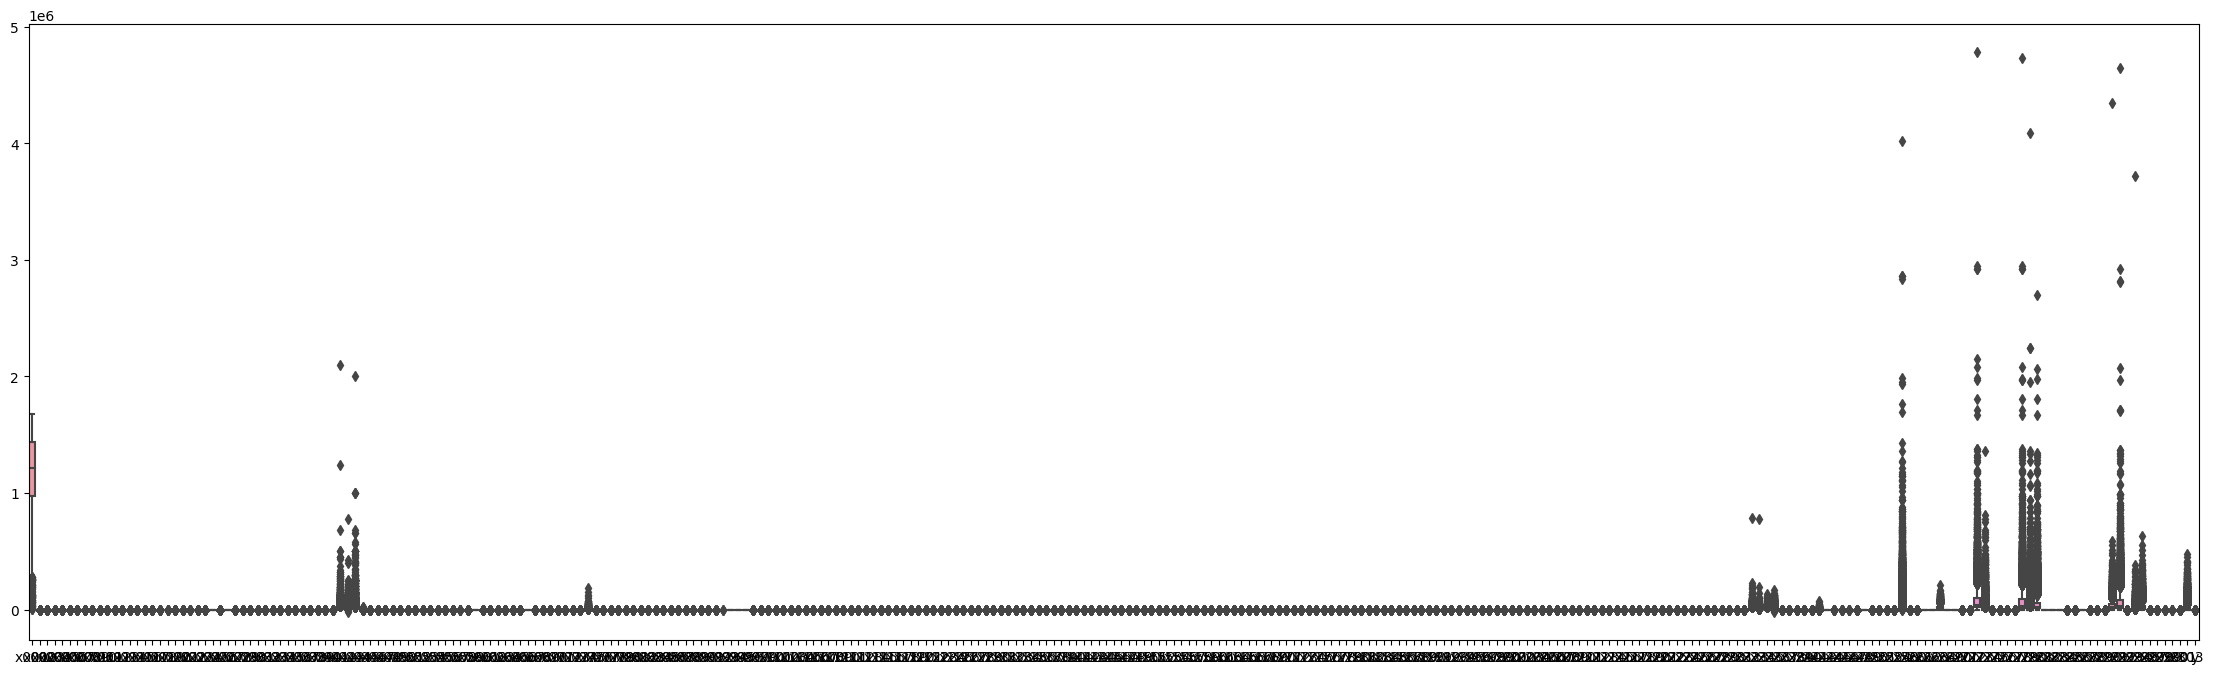

In [38]:
%matplotlib inline
plt.figure(figsize = (28,8))
sns.boxplot(data=filtered_df)

In [39]:
print(pd.isnull(filtered_df).any())

x001    False
x002    False
x003    False
x004    False
x005    False
        ...  
x299    False
x300    False
x301    False
x303    False
y       False
Length: 289, dtype: bool


In [40]:
filtered_df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x293,x294,x296,x297,x298,x299,x300,x301,x303,y
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,1.0180,0,17413,1.0180,1,1,1,0,0,485
11,1163403,152.0,3.0,59.0,152.0,0,2,2,2,0,...,0.9784,0,26278,0.9784,1,1,1,0,0,655
20,1061526,159.0,3.0,91.0,159.0,0,3,3,0,1,...,0.6191,34224,6390,0.5164,1,1,1,1,29893,547
41,1611235,188.0,14.0,107.0,188.0,0,0,0,2,1,...,0.6271,0,6742,0.6271,1,1,1,0,0,679
43,1608716,60.0,2.0,22.0,119.0,0,3,5,4,1,...,0.6559,0,14602,0.6559,1,1,1,0,0,506


In [41]:
#Correlation with output variable
cor_target = abs(filtered_df.corr()["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.3]
relevant_features

x001    0.097999
x003    0.133687
x006    0.043092
x007    0.092779
x008    0.165417
          ...   
x298    0.009000
x299    0.001059
x300    0.005257
x301    0.094014
x303    0.080123
Name: y, Length: 221, dtype: float64

In [42]:
lst_key=[]
null_key=[]
for i,j in relevant_features.items():
    lst_key.append(i)
#print(lst_key.count())

final_df=filtered_df.drop(columns=lst_key,axis=1)
print(final_df.shape)


(10914, 68)


In [43]:
a=final_df.isnull().any()==True

In [44]:
for i,j in a.items():
    if j==True:
        null_key.append(i)
print(null_key)
final_df=filtered_df.drop(columns=lst_key,axis=1)

[]


In [45]:
type(a)

pandas.core.series.Series

In [46]:
for i,j in a.items():
    if j==True:
        null_key.append(i)
print(null_key)

[]


In [47]:
for i in null_key:
    final_df[i].fillna(final_df[i].mean(),inplace=True)
final_df.shape

(10914, 68)

In [58]:
#train_final = final_df[final_df.source=="train"]
#test_final = final_df[final_df.source=="test"]

#print(train_final.shape)
#print(test_final.shape)

#train_final.drop(columns="source",inplace=True)
#test_final.drop(columns="source",inplace=True)

In [48]:
X = final_df.drop("y", axis=1)
Y = final_df["y"]
print(X.shape)
print(Y.shape)

(10914, 67)
(10914,)


In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [50]:
from sklearn.model_selection import train_test_split

seed      = 42
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8731, 67)
(2183, 67)
(8731,)
(2183,)


Linear: -34.533, 0.835
Time taken for processing Linear: 0:00:00.662120
Lasso: -43.016, 1.277
Time taken for processing Lasso: 0:00:01.196875
Ridge: -34.602, 0.853
Time taken for processing Ridge: 0:00:01.426539
ElasticNet: -53.645, 1.631
Time taken for processing ElasticNet: 0:00:01.709538
DecisionTree: -40.987, 0.839
Time taken for processing DecisionTree: 0:00:07.280071
KNN: -37.082, 0.623
Time taken for processing KNN: 0:00:08.213770
RandomForest: -28.545, 0.561
Time taken for processing RandomForest: 0:05:57.061229
AdaBoost: -33.274, 0.892
Time taken for processing AdaBoost: 0:06:33.936358
GradientBoost: -28.407, 0.588
Time taken for processing GradientBoost: 0:08:04.774925
XGBoost: -29.359, 0.733
Time taken for processing XGBoost: 0:08:09.634105


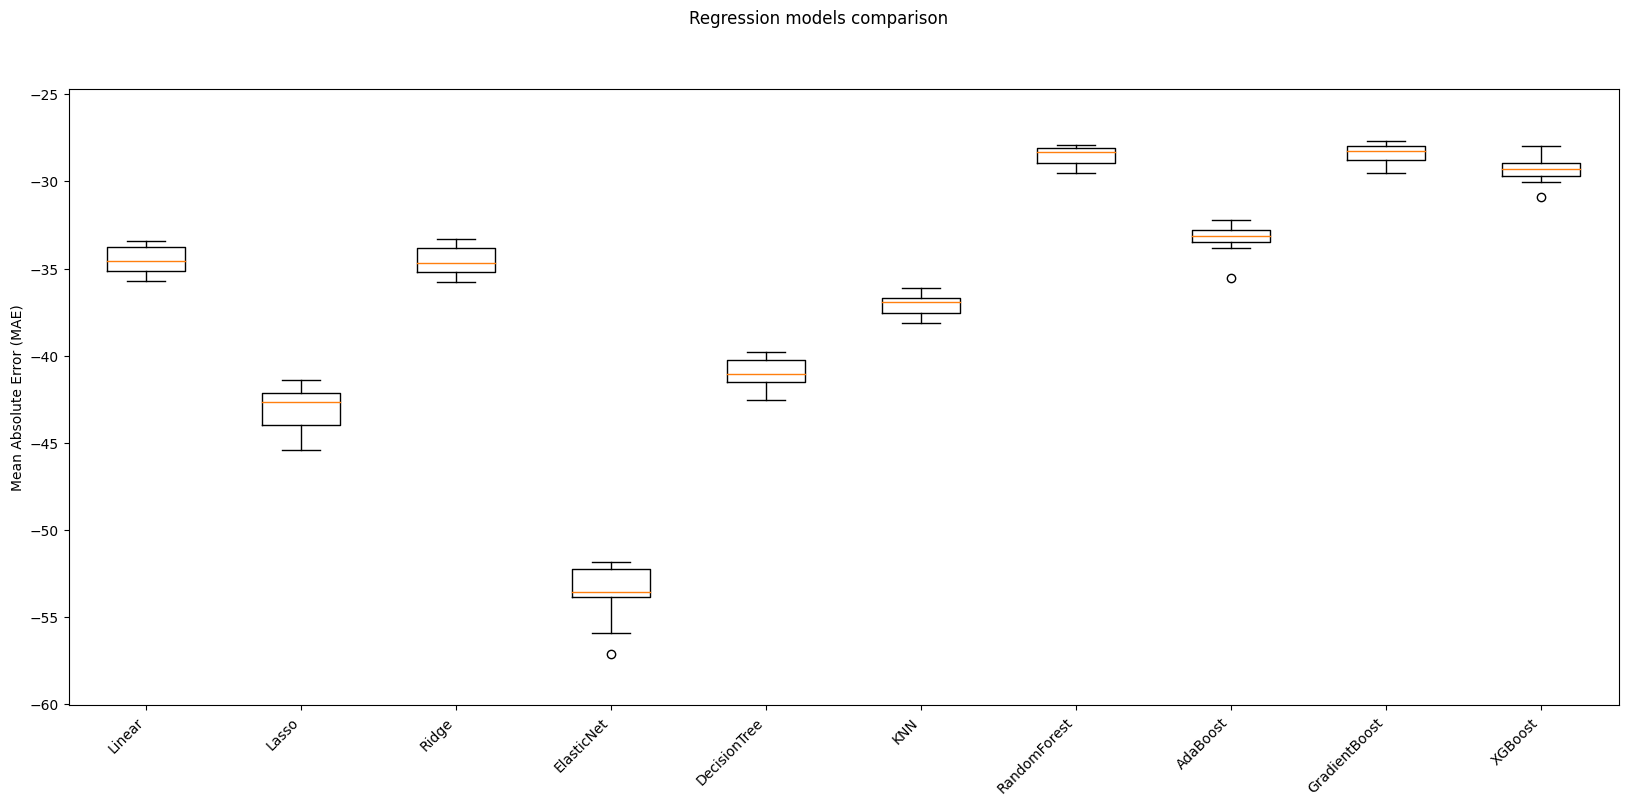

In [52]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

import time
import datetime
import matplotlib.pyplot as plt

# User-defined variables
folds = 10
metric = "neg_mean_absolute_error"
seed = 42  # Assuming you have a seed variable

# Define models
models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# Initialize variables to track processing time
start = time.time()

# 10-fold cross-validation for each model
model_results = []
model_names = []
for model_name, model in models.items():
    k_fold = KFold(n_splits=folds, shuffle=True, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print(f"{model_name}: {round(results.mean(), 3)}, {round(results.std(), 3)}")
    end = time.time()
    list_lapse = end - start
    print(f"Time taken for processing {model_name}: {str(datetime.timedelta(seconds=list_lapse))}")

# Box-whisker plot to compare regression models
figure = plt.figure(figsize=(20, 8))
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation=45, ha="right")
axis.set_ylabel("Mean Absolute Error (MAE)")
plt.margins(0.05, 0.1)
plt.show()


In [54]:
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_train,Y_train)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_train - train_predict) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
Y_train, train_predict = np.array(Y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  2.4742029471942497


In [55]:
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_test,Y_test)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_train - train_predict) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
Y_train, train_predict = np.array(Y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TEST DATA):  5.618891936897636


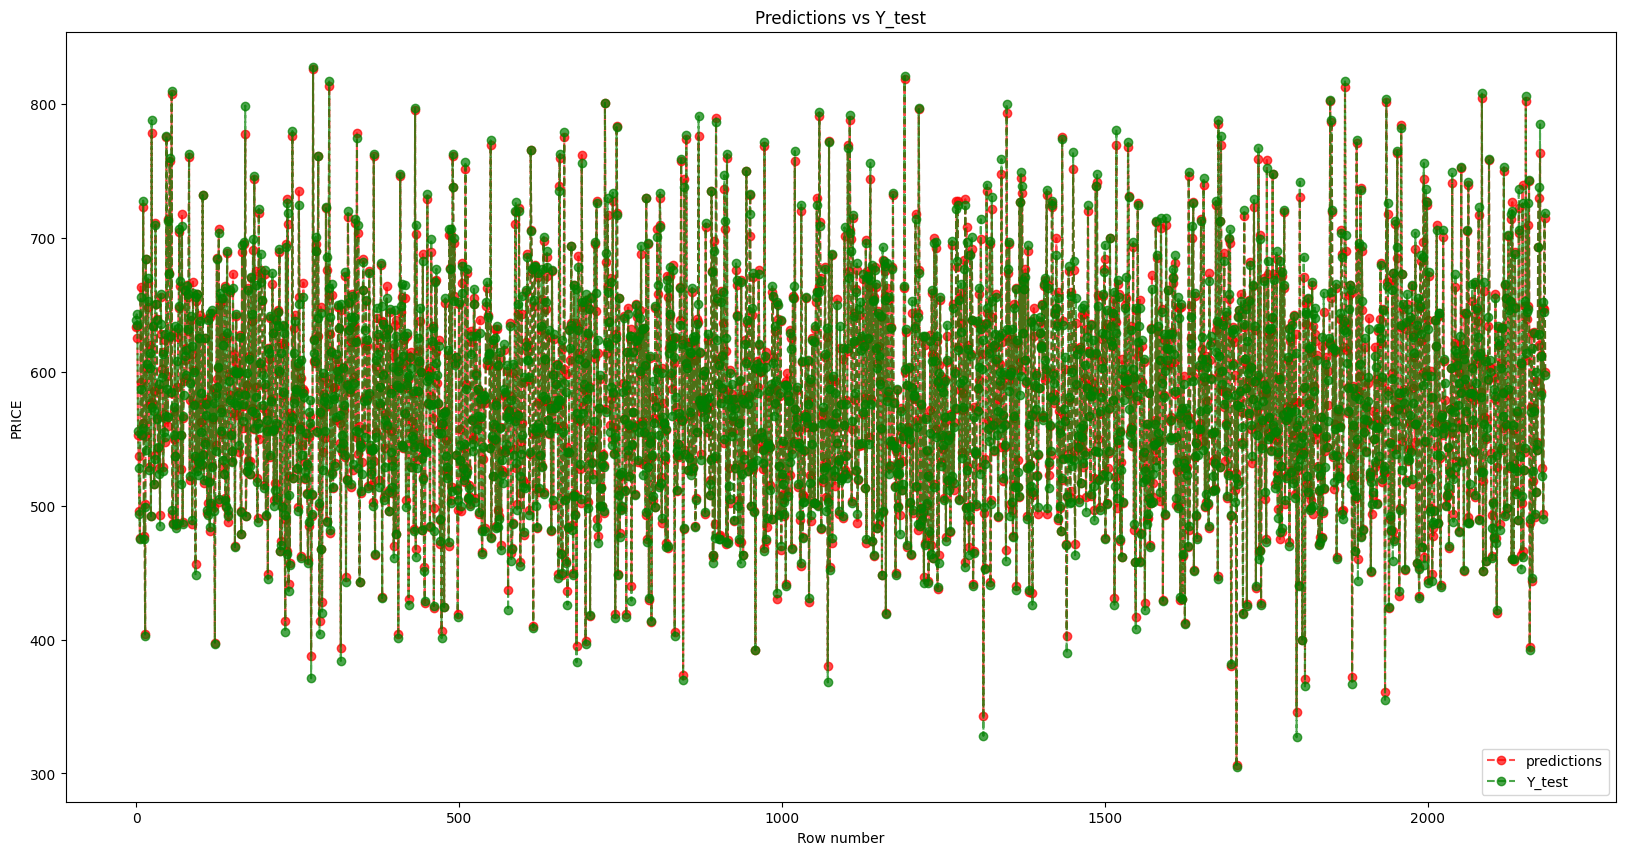

In [56]:
# plot between predictions and Y_test
x_axis = np.array(range(0, test_predict.shape[0]))
plt.figure(figsize=(20,10))
plt.plot(x_axis, test_predict, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')